# Aprendizaje No Supervisado

### Importación de librerias

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

from scipy.spatial.distance import cdist

### Lectura de Datos

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)

In [4]:
data_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20',
       '6/3/20', '6/4/20', '6/5/20', '6/6/20'],
      dtype='object', length=141)

In [5]:
data_confirmed['delta'] = abs(data_confirmed['6/6/20'] - data_confirmed['6/5/20'])

In [6]:
dataset = data_confirmed[['Country/Region','delta']]

In [7]:
dataset.head(20)

,Country/Region,delta
0,Afghanistan,582
1,Albania,20
2,Algeria,115
3,Andorra,0
4,Angola,2
5,Antigua and Barbuda,0
6,Argentina,983
7,Armenia,547
8,Australia,1
9,Australia,1


In [8]:
dataset.rename(columns={'delta':'confirmed'}, inplace=True)

In [9]:
dataset.head(50)

,Country/Region,confirmed
0,Afghanistan,582
1,Albania,20
2,Algeria,115
3,Andorra,0
4,Angola,2
5,Antigua and Barbuda,0
6,Argentina,983
7,Armenia,547
8,Australia,1
9,Australia,1


In [10]:
dataset_group = dataset.groupby("Country/Region")["confirmed"].sum()

In [11]:
dataset_group.head(50)

Country/Region
Afghanistan                   582
Albania                        20
Algeria                       115
Andorra                         0
Angola                          2
Antigua and Barbuda             0
Argentina                     983
Armenia                       547
Australia                       9
Austria                        55
Azerbaijan                    379
Bahamas                         1
Bahrain                       548
Bangladesh                   2635
Barbados                        0
Belarus                       883
Belgium                       165
Belize                          0
Benin                           0
Bhutan                          0
Bolivia                       630
Bosnia and Herzegovina          0
Botswana                        0
Brazil                      27075
Brunei                          0
Bulgaria                       84
Burkina Faso                    0
Burma                           4
Burundi                        20

In [12]:
dataset.columns

Index(['Country/Region', 'confirmed'], dtype='object')

### Analisis de la variable *"rain"*

In [13]:
myDataSet = dataset.loc[:,['Country/Region', 'confirmed']]
myDataSet.set_index('Country/Region',inplace=True)
myDataSet.head()

,confirmed
Country/Region,
Afghanistan,582
Albania,20
Algeria,115
Andorra,0
Angola,2


In [14]:
dataset.describe()

,confirmed
count,266.000000
mean,474.800752
std,2384.395385
min,0.000000
25%,0.000000
50%,2.000000
75%,86.500000
max,27075.000000


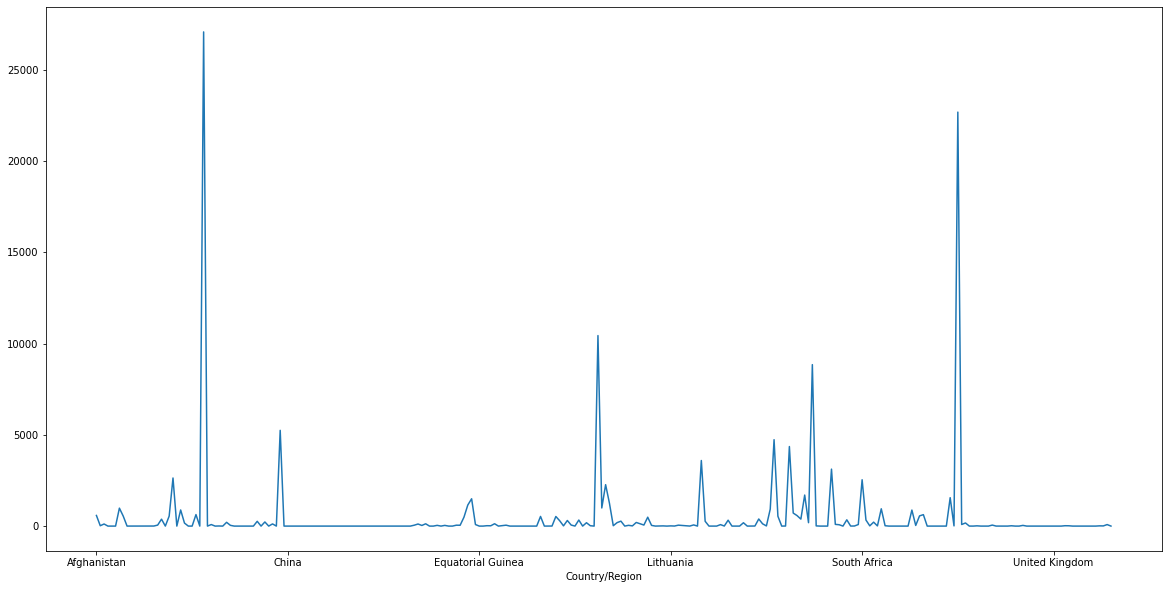

In [15]:
myDataSet.plot(figsize=[20,10],legend=False,)

### Filtrado de datos

In [16]:
#TO-DO Filtrar solo datos con registro de lluvia
X = myDataSet

In [17]:
X.head()

,confirmed
Country/Region,
Afghanistan,582
Albania,20
Algeria,115
Andorra,0
Angola,2


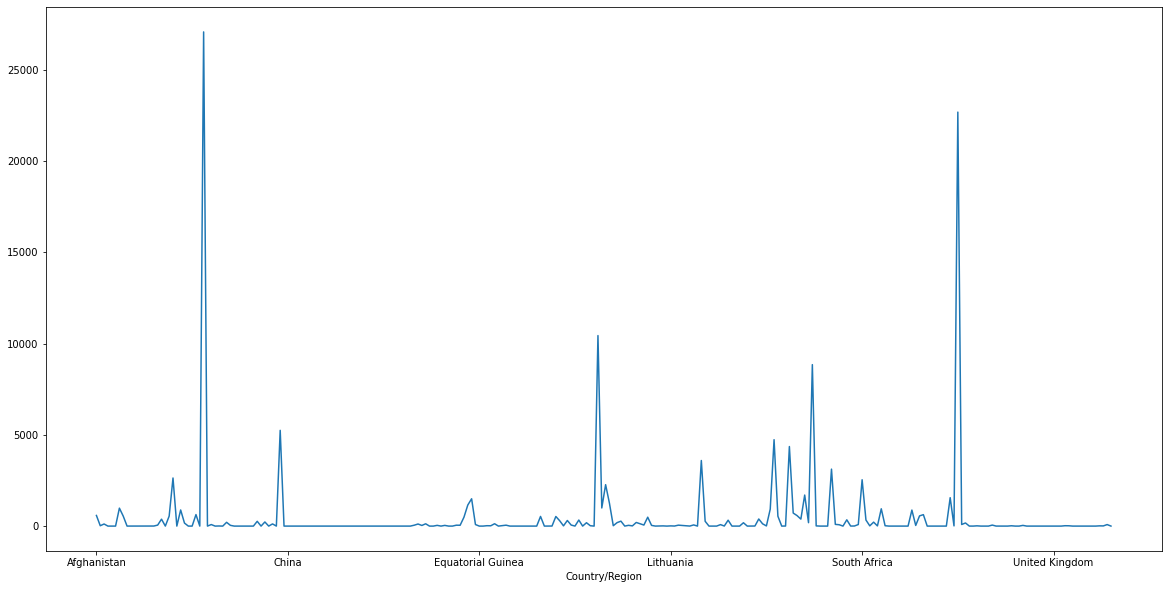

In [18]:
X.plot(figsize=[20,10],legend=False,)

### Aplicación de Elbow Method para analizar cantidad óptima de clusters

In [19]:
X = pd.DataFrame(X)

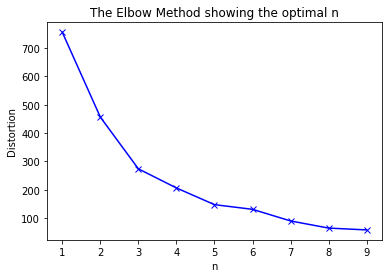

In [20]:
# k means determine k
distortions = []

# Análsis 1..10 clusters
N = range(1,10)

for n in N:
    kmeanModel = KMeans(n_clusters=n, n_jobs=-1)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(N, distortions, 'bx-')
plt.xlabel('n')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal n')
plt.show()

In [21]:
# TO-DO analizar resultado de Elbow Method e indicar cantidad de clusters que considere adecuada

In [22]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9750169892447927
For n_clusters = 3 The average silhouette_score is : 0.9349367008644804
For n_clusters = 4 The average silhouette_score is : 0.9225916915611658
For n_clusters = 5 The average silhouette_score is : 0.872135083263568
For n_clusters = 6 The average silhouette_score is : 0.8668307213888607
For n_clusters = 7 The average silhouette_score is : 0.8506134147776522
For n_clusters = 8 The average silhouette_score is : 0.8345842854101548
For n_clusters = 9 The average silhouette_score is : 0.8295948634923871


In [23]:
# TO-DO Analizar silhouette_score e indicar cantidad de clusters que considere adecuada

In [24]:
# Coinciden la cantidad de clusters indicadas por Elbow Method y silhouette?

### Entreno K-Means

In [25]:
cant_clusters = 3

In [26]:
kmeanModel = KMeans(n_clusters=cant_clusters, verbose=0, n_jobs=-1)
kmeanModel.fit(X)

KMeans(n_clusters=3, n_jobs=-1)

### Visualización de elementos en cada cluster:

In [27]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = kmeanModel.labels_

In [28]:
# TO-DO Mostrar y analizar elementos de cada cluster
cluster_map[cluster_map.cluster == 0]

,data_index,cluster
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Angola,0
...,...,...
261,Sao Tome and Principe,0
262,Yemen,0
263,Comoros,0
264,Tajikistan,0


In [29]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
28,Brazil,1
225,US,1


In [30]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
48,Chile,2
131,India,2
158,Mexico,2
177,Pakistan,2
181,Peru,2
187,Russia,2
192,Saudi Arabia,2


### Visualizacion de centroides

In [31]:
# TO-DO Mostrar centroides de cada cluster
print(kmeanModel.cluster_centers_)

[[  140.87548638]
 [24878.        ]
 [ 5762.28571429]]
